<a href="https://colab.research.google.com/github/gautamsingh24/MLRepo/blob/main/lenier_regression_ridge_lasso_regression_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
##Linear Regression

##**Linear Regression**

In [7]:
import pandas as pd
#from sklearn.datasets import load_boston # boston house price dataset is removed from sklearn v1.2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import files


uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [9]:
import io

df = pd.read_csv(io.BytesIO(uploaded['BostonHousing.csv']))


In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
# Let's check the column name and related data type and null value hold by each column.
# Since no any column hold null value and all columns are either float or int so don't need to pre-process to remove null value or convert obj to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
# Check if there are any null values in the entire DataFrame
any_null = df.isnull().values.any()
any_null

False

In [13]:
df.rename(columns={'medv':'price'}, inplace = True)

In [14]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
# Let's keep dependent and independent feature seperate. Here we know price feature in dependent and remaining feature in independent so we keep the all independent
# feature in x and and dependent feature in y.
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range
y = np.round(df['price'])

In [16]:
X.shape

(506, 13)

In [17]:
y.shape

(506,)

In [18]:
# We don't want to train all data rather we want to keep for testing as well so
# Let's split the data as train and test
# Reffer this document for train test split. We can use the code as well: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Here we are going to split the data into x_train,y_train, x_test and y_test. As we know x is independent and y is dependent feature simillarly. x_train and x_test is independent
# feature and y_test,y_train is dependent feature. Since we need to train the data along with dependent and independent feature so that predection can be accurate
# so we will train the data x_train(independent feature), y_train(dependent feature). We will test our model with the help of x_test(independent (will provide the input)) and y_test(dependent(predect value))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42) # keep 30% data for testing remaining for training

In [19]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03
26,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307,21.0,376.88,14.81
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27


In [20]:
y_train.head()

478    15.0
26     17.0
7      27.0
492    20.0
108    20.0
Name: price, dtype: float64

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 478 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     339 non-null    float64
 1   zn       339 non-null    float64
 2   indus    339 non-null    float64
 3   chas     339 non-null    int64  
 4   nox      339 non-null    float64
 5   rm       339 non-null    float64
 6   age      339 non-null    float64
 7   dis      339 non-null    float64
 8   rad      339 non-null    int64  
 9   tax      339 non-null    int64  
 10  ptratio  339 non-null    float64
 11  b        339 non-null    float64
 12  lstat    339 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 37.1 KB


In [22]:
# For making good model we maximum time need to do standarazation which make the model more accurate and predected value will more accurate.
# Makesure it when we Scale the data then those data shouldn't be object type.
from sklearn.preprocessing import StandardScaler
# initialize the StandardScaller
scaller = StandardScaler()
# Now fit and transform the X_train and X_test means all independent feature need to transform
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)
X_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

In [23]:
X_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]])

In [24]:
# When we need to transform the data in previous form then we need to use the invers_transform(transform_target)
#scaller.inverse_transform(X_train)

## Apply Linear Regression (Multi linear regression)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [26]:
# Initialize LinearRegression
# Always use the cross validation so that we can check how much difference are between actual output and predicted output.
# To check the which scoring need to provide see the link https://scikit-learn.org/stable/modules/model_evaluation.html
# Makesure output should be as minimum because it is the different between predicted value and actual value.
regression = LinearRegression()
regression.fit(X_train,y_train) # fit the model on training data
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
mse

array([-26.89126634, -40.99850649, -28.27003463, -19.64272521,
       -32.2683991 , -22.42316522, -16.78633289, -17.66840112,
       -13.55614935, -37.66889652])

In [27]:
# Now let's find the actual value or mean value
# Output looks good. Since it is very smaller, hance we can say our model will be good since actual output and predicted output difference will -25 means very less.
np.mean(mse)

-25.617387687545254

In [28]:
# here we predict the data on entire X_test data which has 30% of all data.
reg_pred = regression.predict(X_test)

In [29]:
# output
reg_pred

array([28.53447002, 36.59915603, 15.58869106, 25.51856797, 18.736055  ,
       23.10448258, 17.25975139, 13.97211948, 22.96501352, 20.55438934,
       24.82369478, 18.35701968, -6.75401926, 21.79788152, 19.13549164,
       26.0866985 , 20.08567222,  5.64141444, 40.25377346, 17.45266533,
       27.46628777, 30.1503144 , 10.75248614, 23.88285103, 18.02401059,
       15.9582663 , 23.25519556, 14.427703  , 22.31028307, 19.33304098,
       22.13451839, 25.09022239, 25.08691786, 18.55643988, 16.54398628,
       17.52044232, 30.73382546, 20.0915985 , 23.96772399, 24.95438329,
       13.962613  , 31.58634659, 42.34072037, 17.68782885, 26.94534719,
       17.1569141 , 13.65215789, 26.1646209 , 20.24673324, 30.04243604,
       21.17555425, 34.02431061, 15.38089927, 26.00041407, 39.1748347 ,
       23.00322641, 18.83307365, 32.96910966, 24.75354933, 12.76797664,
       22.42494514, 30.5669499 , 31.66616252, 16.40013337, 20.99667469,
       16.58908239, 20.21994144, 26.13638674, 31.05005575, 11.97

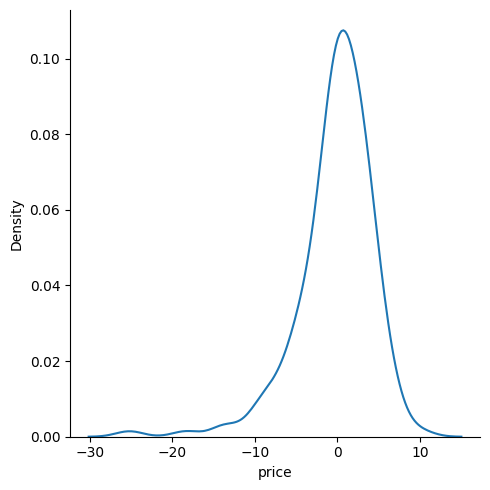

In [30]:
# Let's compare the predicted output to the y_test output
# Here we will use 2 method to compare
# method 1: using displot
# Output: Since maximum data are from -10 to +10
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [31]:
# method 2: using r2_score
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)
score

0.6677095787933727

## Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # For hyper tuning

In [33]:
# initalize the Ridge
ridge = Ridge()
# create a lembda value list for best fitting lines
paramiters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,99]}
ridgecv = GridSearchCV(ridge,paramiters,scoring='neg_mean_squared_error',cv=10)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   99]},
             scoring='neg_mean_squared_error')

In [34]:
# Check the best paramiter value
ridgecv.best_params_

{'alpha': 10}

In [35]:
ridgecv.best_score_

-25.545245657367744

In [38]:
# Predict the test data
ridgecv_pred = ridgecv.predict(X_test)
ridgecv_pred

array([28.28354789, 36.15902341, 16.30539062, 25.42232331, 18.69942476,
       23.08811111, 17.49757344, 14.28785054, 22.46190823, 20.71548244,
       24.66155654, 18.7445798 , -6.06630296, 21.95741517, 19.23647737,
       25.75271098, 19.43537946,  5.73050699, 39.67758876, 17.45897871,
       27.16993259, 29.62483703, 11.28743943, 23.98895843, 17.90565009,
       15.59275172, 23.23982727, 14.63188388, 22.4212553 , 19.54661097,
       21.92939344, 25.12190429, 24.93749858, 18.4018058 , 16.25710866,
       17.95239788, 30.76182139, 20.23612583, 24.1110947 , 24.91636977,
       14.27264076, 30.89760516, 41.4229688 , 18.04954456, 26.92651422,
       16.98642924, 14.02355705, 26.11850714, 19.93110848, 30.18802934,
       21.42045389, 33.58975503, 15.81484052, 26.13300358, 38.7095627 ,
       22.76330663, 18.78843998, 32.28011311, 24.81221787, 13.24628957,
       22.70600596, 30.39763233, 31.26255585, 16.65757925, 21.97131211,
       16.7742031 , 20.07090551, 26.04680189, 30.599062  , 12.08

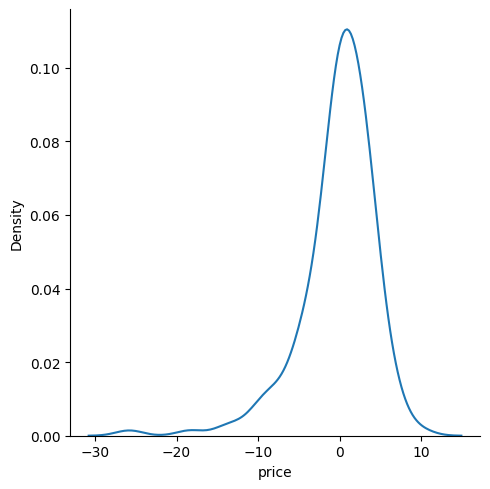

In [39]:
# Let's compare the predicted output to the y_test output
# Here we will use 2 method to compare
# method 1: using displot
# Output: Since maximum data are from -10 to +10
import seaborn as sns
sns.displot(ridgecv_pred-y_test,kind='kde')

In [40]:
# method 2: using r2_score
from sklearn.metrics import r2_score
score = r2_score(ridgecv_pred,y_test)
score

0.6450595472217393

## Laso Regression

In [41]:
from sklearn.linear_model import Lasso

In [42]:
# initalize the Lasso
lasso = Lasso()
# create a lembda value list for best fitting lines
paramiters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,99]}
lassocv = GridSearchCV(lasso,paramiters,scoring='neg_mean_squared_error',cv=10)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   99]},
             scoring='neg_mean_squared_error')

In [43]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-30.394838788574294


In [45]:
lassocv_pred = lassocv.predict(X_test)
lassocv_pred

array([26.06014333, 30.79276193, 17.73968607, 25.26131761, 19.24751077,
       22.79288895, 18.2590841 , 14.57341271, 21.39404321, 20.41167354,
       20.75871103, 20.94737604,  1.21367795, 22.46328014, 20.4035436 ,
       24.72292114, 18.12305468,  6.86088384, 35.82550002, 18.41422239,
       25.66676655, 26.76423878, 13.74311479, 24.00412685, 18.81777524,
       15.49564757, 22.92499787, 18.83643194, 19.95208401, 19.68336416,
       19.94578407, 25.48433221, 25.05590051, 19.61671222, 15.82580011,
       20.4395779 , 30.91075354, 21.73123388, 21.695286  , 24.79078615,
       14.4267831 , 27.49543704, 36.28281108, 19.6549356 , 25.53474543,
       17.22840176, 15.97650676, 25.88085944, 19.33628267, 29.5210225 ,
       23.05459562, 31.36610674, 17.51233788, 25.83017944, 34.97917566,
       22.90541286, 19.36143688, 29.36628705, 24.63821146, 16.68018868,
       25.42011389, 30.68240511, 28.91552122, 18.4326915 , 27.57334314,
       14.58718426, 19.98624258, 25.60966599, 28.33968455, 15.93

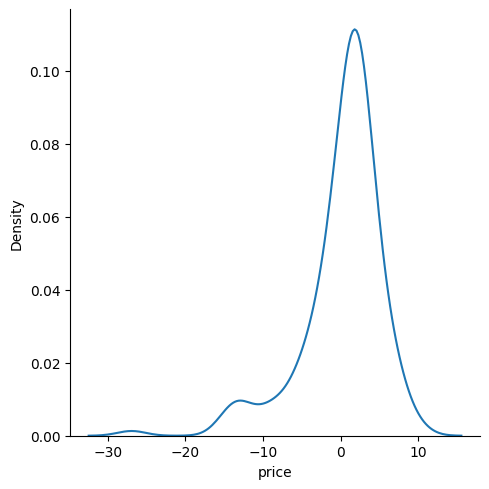

In [48]:
# Let's compare the predicted output to the y_test output
# Here we will use 2 method to compare
# method 1: using displot
# Output: Since maximum data are from -10 to +10
import seaborn as sns
sns.displot(lassocv_pred-y_test,kind='kde')

In [50]:
# method 2: using r2_score
from sklearn.metrics import r2_score
score = r2_score(lassocv_pred,y_test)
score

0.30949297977719736